In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load dataset
df=pd.read_excel('/content/Airbnb_Data.xlsx')

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [7]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


In [14]:
#drop duplicated values
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().value_counts()

,count
False,102058


In [21]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [35]:
#replace null values with mean or median
df.fillna(df.median(numeric_only=True),inplace=True)
df.dropna(subset=['NAME'],inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [36]:
df.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0


In [37]:
df.shape

(101788, 24)

In [38]:
#remove dollar sign in price and service fee columns
#convert to str
df['price']=df['price'].astype(str).replace('$','')
df['service fee']=df['service fee'].astype(str).replace('$','')
#remove all commas
df['price']=df['price'].str.replace(',','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)
#convert back to float
df['price']=df['price'].astype(float)
df['service fee']=df['service fee'].astype(float)


In [39]:
#remove price and service fee columns
df.rename(columns={'price':'price_$','service fee':'service_fee_$'},inplace=True)
df.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0


In [46]:
#correct spelling of london
df.loc[df['neighbourhood group']=='Lyndon','neighbourhood group']='London'
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'
df.loc[df['neighbourhood group']=='manhatan','neighbourhood group']='Manhattan'

**What are the different property types in dataset ?**

In [47]:
#Different types of property in dataset
df.columns = df.columns.str.strip()
property_types=df['room type'].value_counts().to_frame(name="Count")
property_types

,Count
room type,
Entire home/apt,53303
Private room,46168
Shared room,2202
Hotel room,115


Text(0.5, 1.0, 'Property Types and their count in dataset')

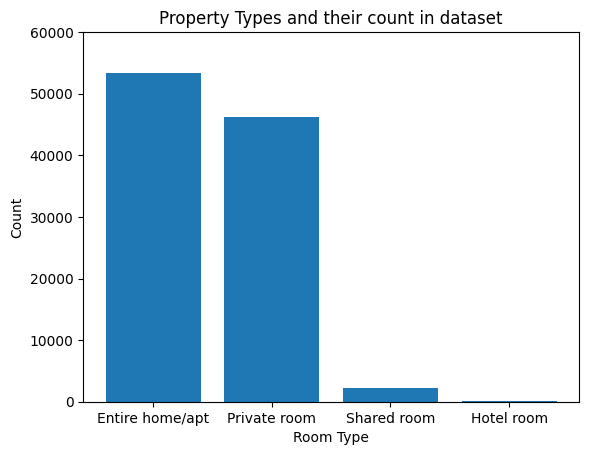

In [50]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,'Count'])
plt.ylim([0,60000])
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Property Types and their count in dataset')

**Which neighbourhood has highest number of listings ?**

In [51]:
hood_group=df['neighbourhood group'].value_counts().to_frame(name='count')
hood_group

,count
neighbourhood group,
Manhattan,43476
Brooklyn,41509
Queens,13169
Bronx,2686
Staten Island,948


Text(0.5, 1.0, 'Which neighbourhood has highest number of listings')

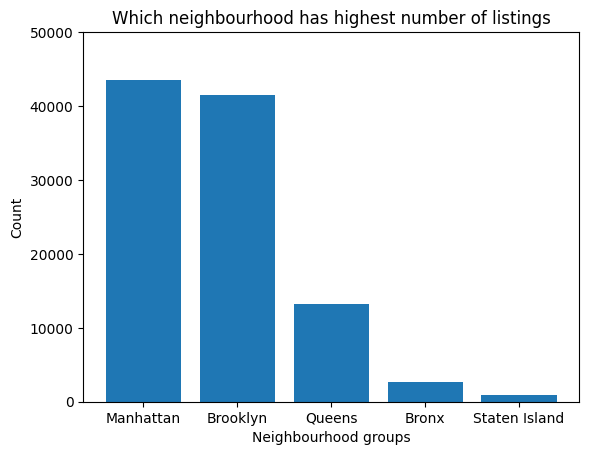

In [52]:
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,'count'])
plt.ylim([0,50000])
plt.xlabel('Neighbourhood groups')
plt.ylabel('Count')
plt.title('Which neighbourhood has highest number of listings')

**Which neighbourhood has highest avg prices for airbnb listings ?**

In [53]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame(name='avg_price')
avg_price

,avg_price
neighbourhood group,
Queens,630.342775
Bronx,627.772524
Brooklyn,626.411212
Staten Island,624.488397
Manhattan,622.732381


Text(0.5, 1.0, 'Which neighbourhood has highest avg prices for airbnb listings')

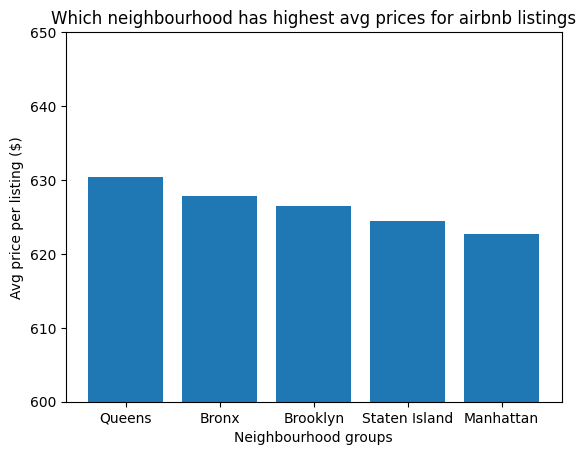

In [63]:
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,'avg_price'])
plt.ylim([600,650])
plt.xlabel('Neighbourhood groups')
plt.ylabel('Avg price per listing ($)')
plt.title('Which neighbourhood has highest avg prices for airbnb listings')

**Is there any relationship between construction year and price**

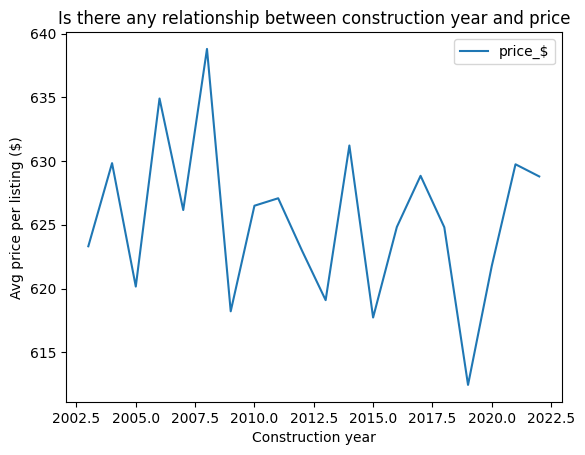

In [65]:
df.groupby(df['Construction year'])['price_$'].mean().plot(kind='line')
plt.xlabel('Construction year')
plt.ylabel('Avg price per listing ($)')
plt.title('Is there any relationship between construction year and price')
plt.legend()

**Who are the top 10 hosts by calculated host listing count ?**

In [67]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).head(10).to_frame(name='listing')
hosts

,listing
host name,
Sonder (NYC),155521.0
Blueground,76484.0
Karen,43291.0
Jeniffer,32603.0
Kara,27175.0
Sonder,19680.0
Kaz,18196.0
Ken,17586.0
Corporate Housing,16835.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sonder (NYC)'),
  Text(1, 0, 'Blueground'),
  Text(2, 0, 'Karen'),
  Text(3, 0, 'Jeniffer'),
  Text(4, 0, 'Kara'),
  Text(5, 0, 'Sonder'),
  Text(6, 0, 'Kaz'),
  Text(7, 0, 'Ken'),
  Text(8, 0, 'Corporate Housing'),
  Text(9, 0, 'Jeremy & Laura')])

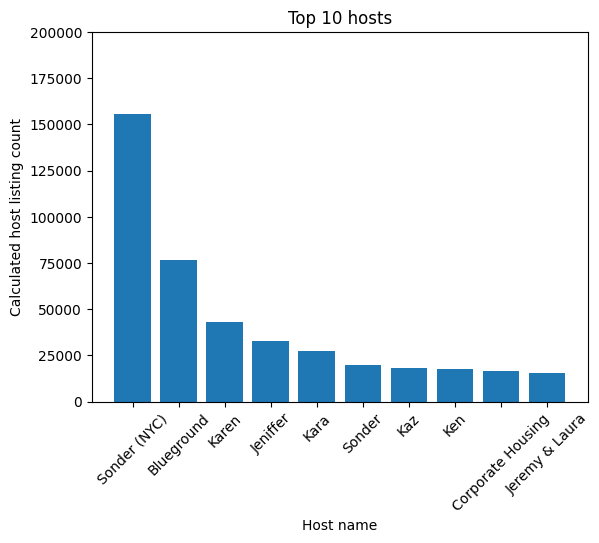

In [77]:
hosts_bar=plt.bar(hosts.index,hosts.loc[:,'listing'])
plt.ylim([0,200000])
plt.xlabel('Host name')
plt.ylabel('Calculated host listing count')
plt.title('Top 10 hosts')
plt.xticks(rotation=45)

**Are hosts with verified identities more likely to recieve positive reviews ?**

In [85]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame(name='number')
review

,number
host_identity_verified,
verified,3.285021
unconfirmed,3.270914


[Text(0, 4, '3.29'), Text(0, 4, '3.27')]

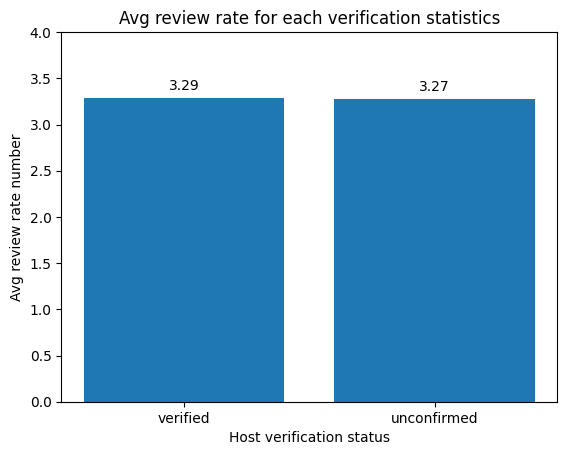

In [93]:
review_bar=plt.bar(review.index,review.loc[:,'number'])
plt.ylim([0,4])
plt.xlabel('Host verification status')
plt.ylabel('Avg review rate number')
plt.title('Avg review rate for each verification statistics')
plt.bar_label(review_bar,labels=round(review.loc[:,'number'],2),padding=4)

Text(0.5, 1.0, 'Avg review rate for each verification statistics')

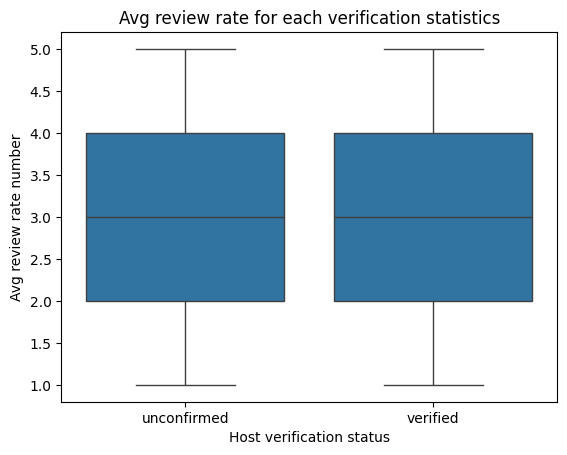

In [94]:
sns.boxplot(x='host_identity_verified',y='review rate number',data=df)
plt.xlabel('Host verification status')
plt.ylabel('Avg review rate number')
plt.title('Avg review rate for each verification statistics')

**Is there relation between price of listing and its service fee ?**

In [95]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9978273660406366)

Text(0.5, 1.0, 'Relation between price of listing and its service fee')

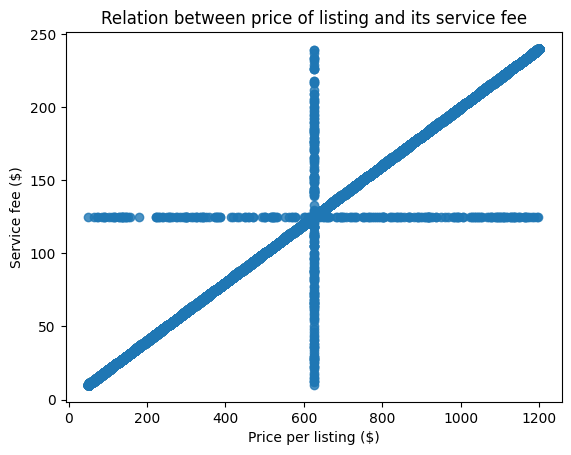

In [97]:
sns.regplot(df,x='price_$',y='service_fee_$')
plt.xlabel('Price per listing ($)')
plt.ylabel('Service fee ($)')
plt.title('Relation between price of listing and its service fee')


**What is the avg review rate number for listings , does it vary based on neighbourhood group or room type ?**

In [98]:
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame(name='avg_review_rate')
ARRN

avg_review_rate
neighbourhood group room type                       
Bronx               Entire home/apt         3.343811
                    Private room            3.323473
                    Shared room             3.283186
Brooklyn            Entire home/apt         3.248862
                    Hotel room              3.857143
                    Private room            3.263293
                    Shared room             3.335766
Manhattan           Entire home/apt         3.275163
                    Hotel room              3.500000
                    Private room            3.276352
                    Shared room             3.257559
Queens              Entire home/apt         3.349324
                    Hotel room              3.750000
                    Private room            3.313970
                    Shared room             3.367688
Staten Island       Entire home/apt         3.327004
                    Private room            3.474946
                    Shared room             3.533333

Text(0.5, 1.0, 'Avg review rate number for listings , does it vary based on neighbourhood group or room type')

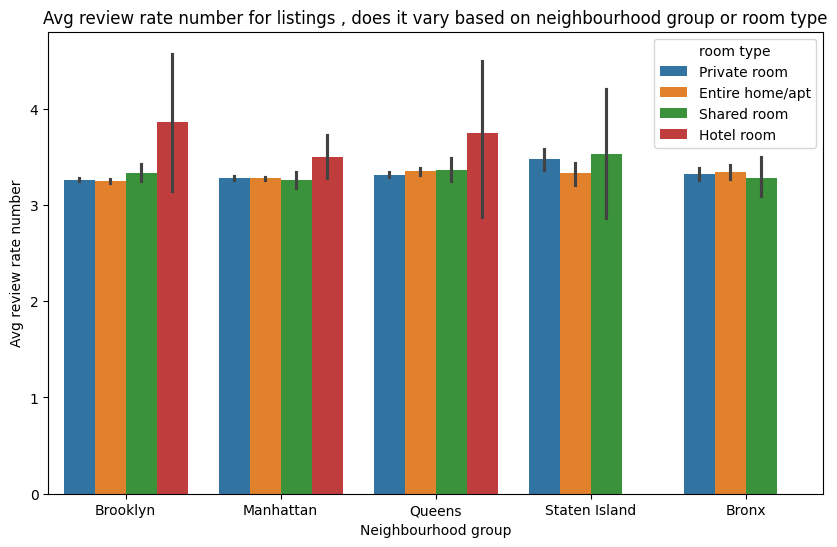

In [99]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type')
plt.xlabel('Neighbourhood group')
plt.ylabel('Avg review rate number')
plt.title('Avg review rate number for listings , does it vary based on neighbourhood group or room type')

**Are hosts with higher calculated host listings count more likely to maintain higher availability throughout the year ?**

Text(0.5, 1.0, 'Regression plot of relationship between calculated host listings and Availability 365')

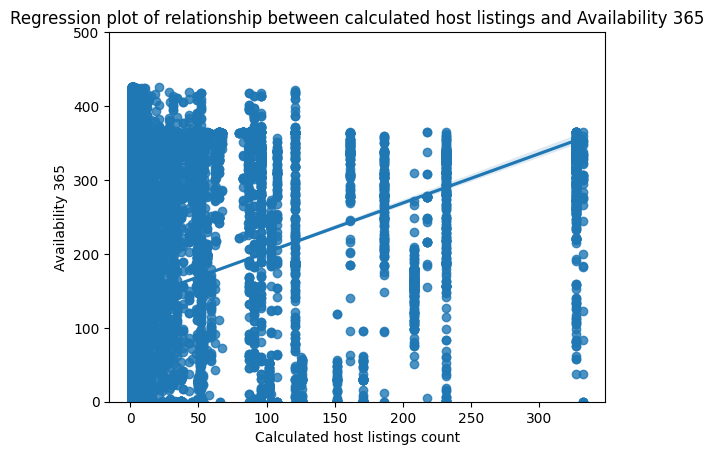

In [101]:
sns.regplot(data=df,x='calculated host listings count',y='availability 365')
plt.ylim([0,500])
plt.xlabel('Calculated host listings count')
plt.ylabel('Availability 365')
plt.title('Regression plot of relationship between calculated host listings and Availability 365')

In [102]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.15884866506561246)